# 5.1 - Árvore de Classificação

### Definição:

&emsp; Uma árvore de decisão é uma estrutura de árvore semelhante a um fluxograma em que um nó interno representa o recurso (ou atributo), a ramificação representa uma regra de decisão e cada nó folha representa o resultado. O nó superior em uma árvore de decisão é conhecido como nó raiz. Ele aprende a particionar com base no valor do atributo. Ele particiona a árvore de maneira recursiva, chamando o particionamento recursivo. Essa estrutura semelhante a um fluxograma o ajuda na tomada de decisões. É a visualização como um diagrama de fluxo que facilmente imita o pensamento do nível humano. É por isso que as árvores de decisão são fáceis de entender e interpretar.

![fig_1](https://i.ibb.co/PtsQw0X/decision-tree-1-drawio.png)


&emsp;A árvore de decisão é um tipo de algoritmo de ML de caixa branca. Ele compartilha a lógica interna de tomada de decisão, que não está disponível no tipo de caixa preta de algoritmos, como Rede Neural. Seu tempo de treinamento é mais rápido em comparação com o algoritmo de rede neural. A complexidade de tempo das árvores de decisão é uma função do número de registros e do número de atributos nos dados fornecidos. A árvore de decisão é um método livre de distribuição ou não paramétrico, que não depende de suposições de distribuição de probabilidade. As árvores de decisão podem lidar com dados dimensionais elevados com boa precisão.

### Como funciona

As ideias básicas em qualquer algoritmo de árvore de decisão são:
* 01 - Selecionar o melhor atributo usando **Attribute Selection Measures (ASM)** ou Medidas de seleção de atributos, para dividir os registros;

* 02 - Fazer aquele atributo um nó de decisão e dividir o conjunto de dados em subconjuntos menores;

* 03 - Inicia a construção da árvore repetindo este processo recursivamente para cada filho até que uma das condições corresponda:
    * Todas as tuplas pertençam ao mesmo valor de atributo;
    * Nâo tenha mais atributos restantes;
    * Não tenha mais instâncias;
    
![fig_3](https://i.ibb.co/3cHdf0n/decision-tree-1-drawio-1.png)    

### Medidas de seleção de atributos (ASM)

&emsp;A medida de seleção de atributos é uma heurística para selecionar o critério de divisão que particiona os dados da melhor maneira possível. Também é conhecido como regras de divisão porque nos ajuda a determinar pontos de interrupção para tuplas em um determinado nó. ASM fornece uma classificação para cada recurso (ou atributo), explicando o conjunto de dados fornecido. O melhor atributo de pontuação será selecionado como um atributo de divisão (Fonte). No caso de um atributo de valor contínuo, os pontos de divisão para ramificações também precisam ser definidos. As medidas de seleção mais populares são Information Gain, Gain Ratio e Gini Index.

### Em Python temos

#### Importando bibliotecas necessárias

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

#### Carregando os dados

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("data\diabetes.csv", header=None, names=col_names)
pima = pima.T.drop(columns = 0).T

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


#### Seleção de Recursos

In [4]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

#### Dividindo os dados

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Criando o Modelo

In [6]:
# Criando a Árvore de Decisão
clf = DecisionTreeClassifier()

# Treinamento
clf = clf.fit(X_train,y_train)

# Prevendo a resposta para o conjunto de dados de teste
y_pred = clf.predict(X_test)

#### Avaliando Modelo

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


#### Visualizando a árvore

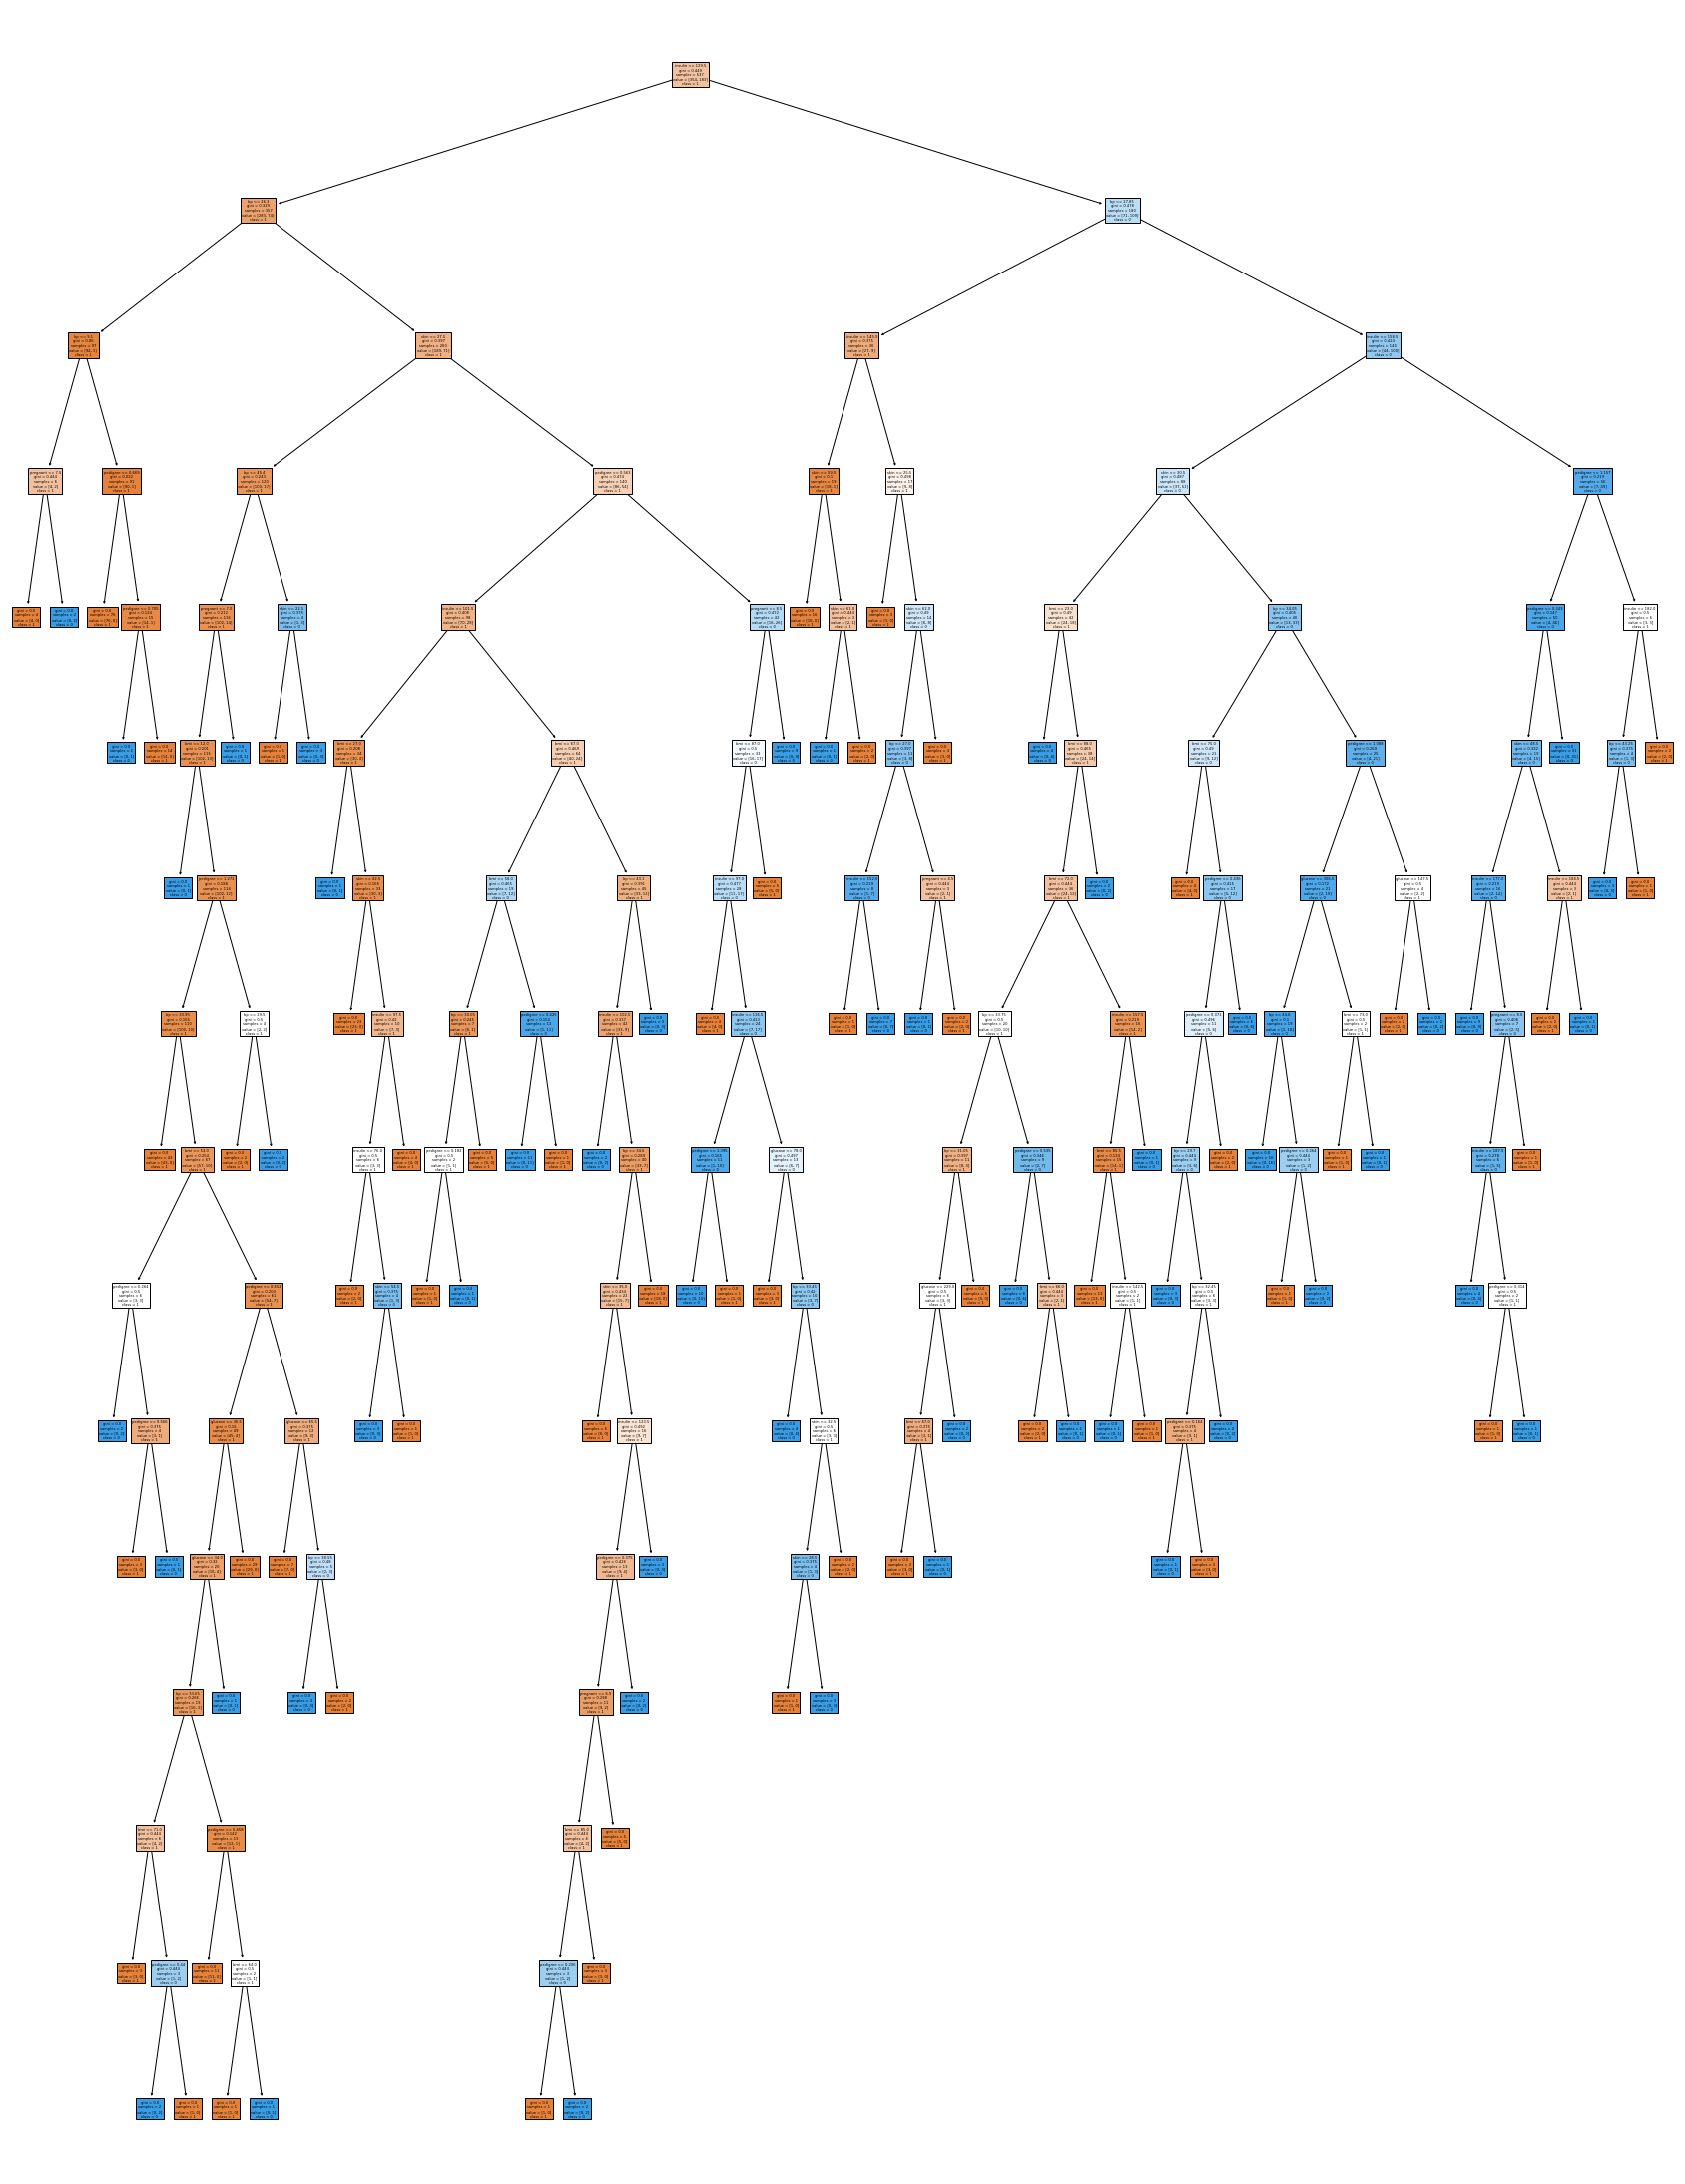

In [36]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(30,40))
_ = tree.plot_tree(clf, 
                   feature_names=list(pima.iloc[:, 0:8].columns),  
                   class_names=pima.label.unique(),
                   filled=True)


No gráfico da árvore de decisão, cada nó interno possui uma regra de decisão que divide os dados. Gini é referido como proporção de Gini, que mede a impureza do nó. Você pode dizer que um nó é puro quando todos os seus registros pertencem à mesma classe, tais nós conhecidos como nó folha.

Aqui, a árvore resultante não foi corrigida. Esta árvore não podada é inexplicável e difícil de entender. Na próxima seção, vamos otimizá-lo por meio da poda.

Otimizando o Desempenho da Árvore de Decisão

* **critério: opcional (padrão = ”gini”) ou Escolher medida de seleção de atributo**: Este parâmetro nos permite usar a medida de seleção de atributo diferente-diferente. Os critérios suportados são “gini” para o índice de Gini e “entropia” para o ganho de informação.

* **divisor: string, opcional (padrão = ”melhor”) ou Estratégia de divisão**: Este parâmetro nos permite escolher a estratégia de divisão. As estratégias com suporte são “melhores” para escolher a melhor divisão e “aleatória” para escolher a melhor divisão aleatória.

* **max_depth: int ou None, opcional (padrão = None) ou Profundidade máxima de uma árvore**: a profundidade máxima da árvore. Se nenhum, os nós são expandidos até que todas as folhas contenham menos do que min_samples_split samples. O valor mais alto da profundidade máxima causa overfitting e um valor mais baixo causa underfitting (Fonte).

No Scikit-learn, a otimização do classificador da árvore de decisão é realizada apenas por pré-poda. A profundidade máxima da árvore pode ser usada como uma variável de controle para pré-poda. No exemplo a seguir, você pode plotar uma árvore de decisão nos mesmos dados com max_depth = 3. Além dos parâmetros de pré-poda, você também pode tentar outra medida de seleção de atributos, como a entropia.

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


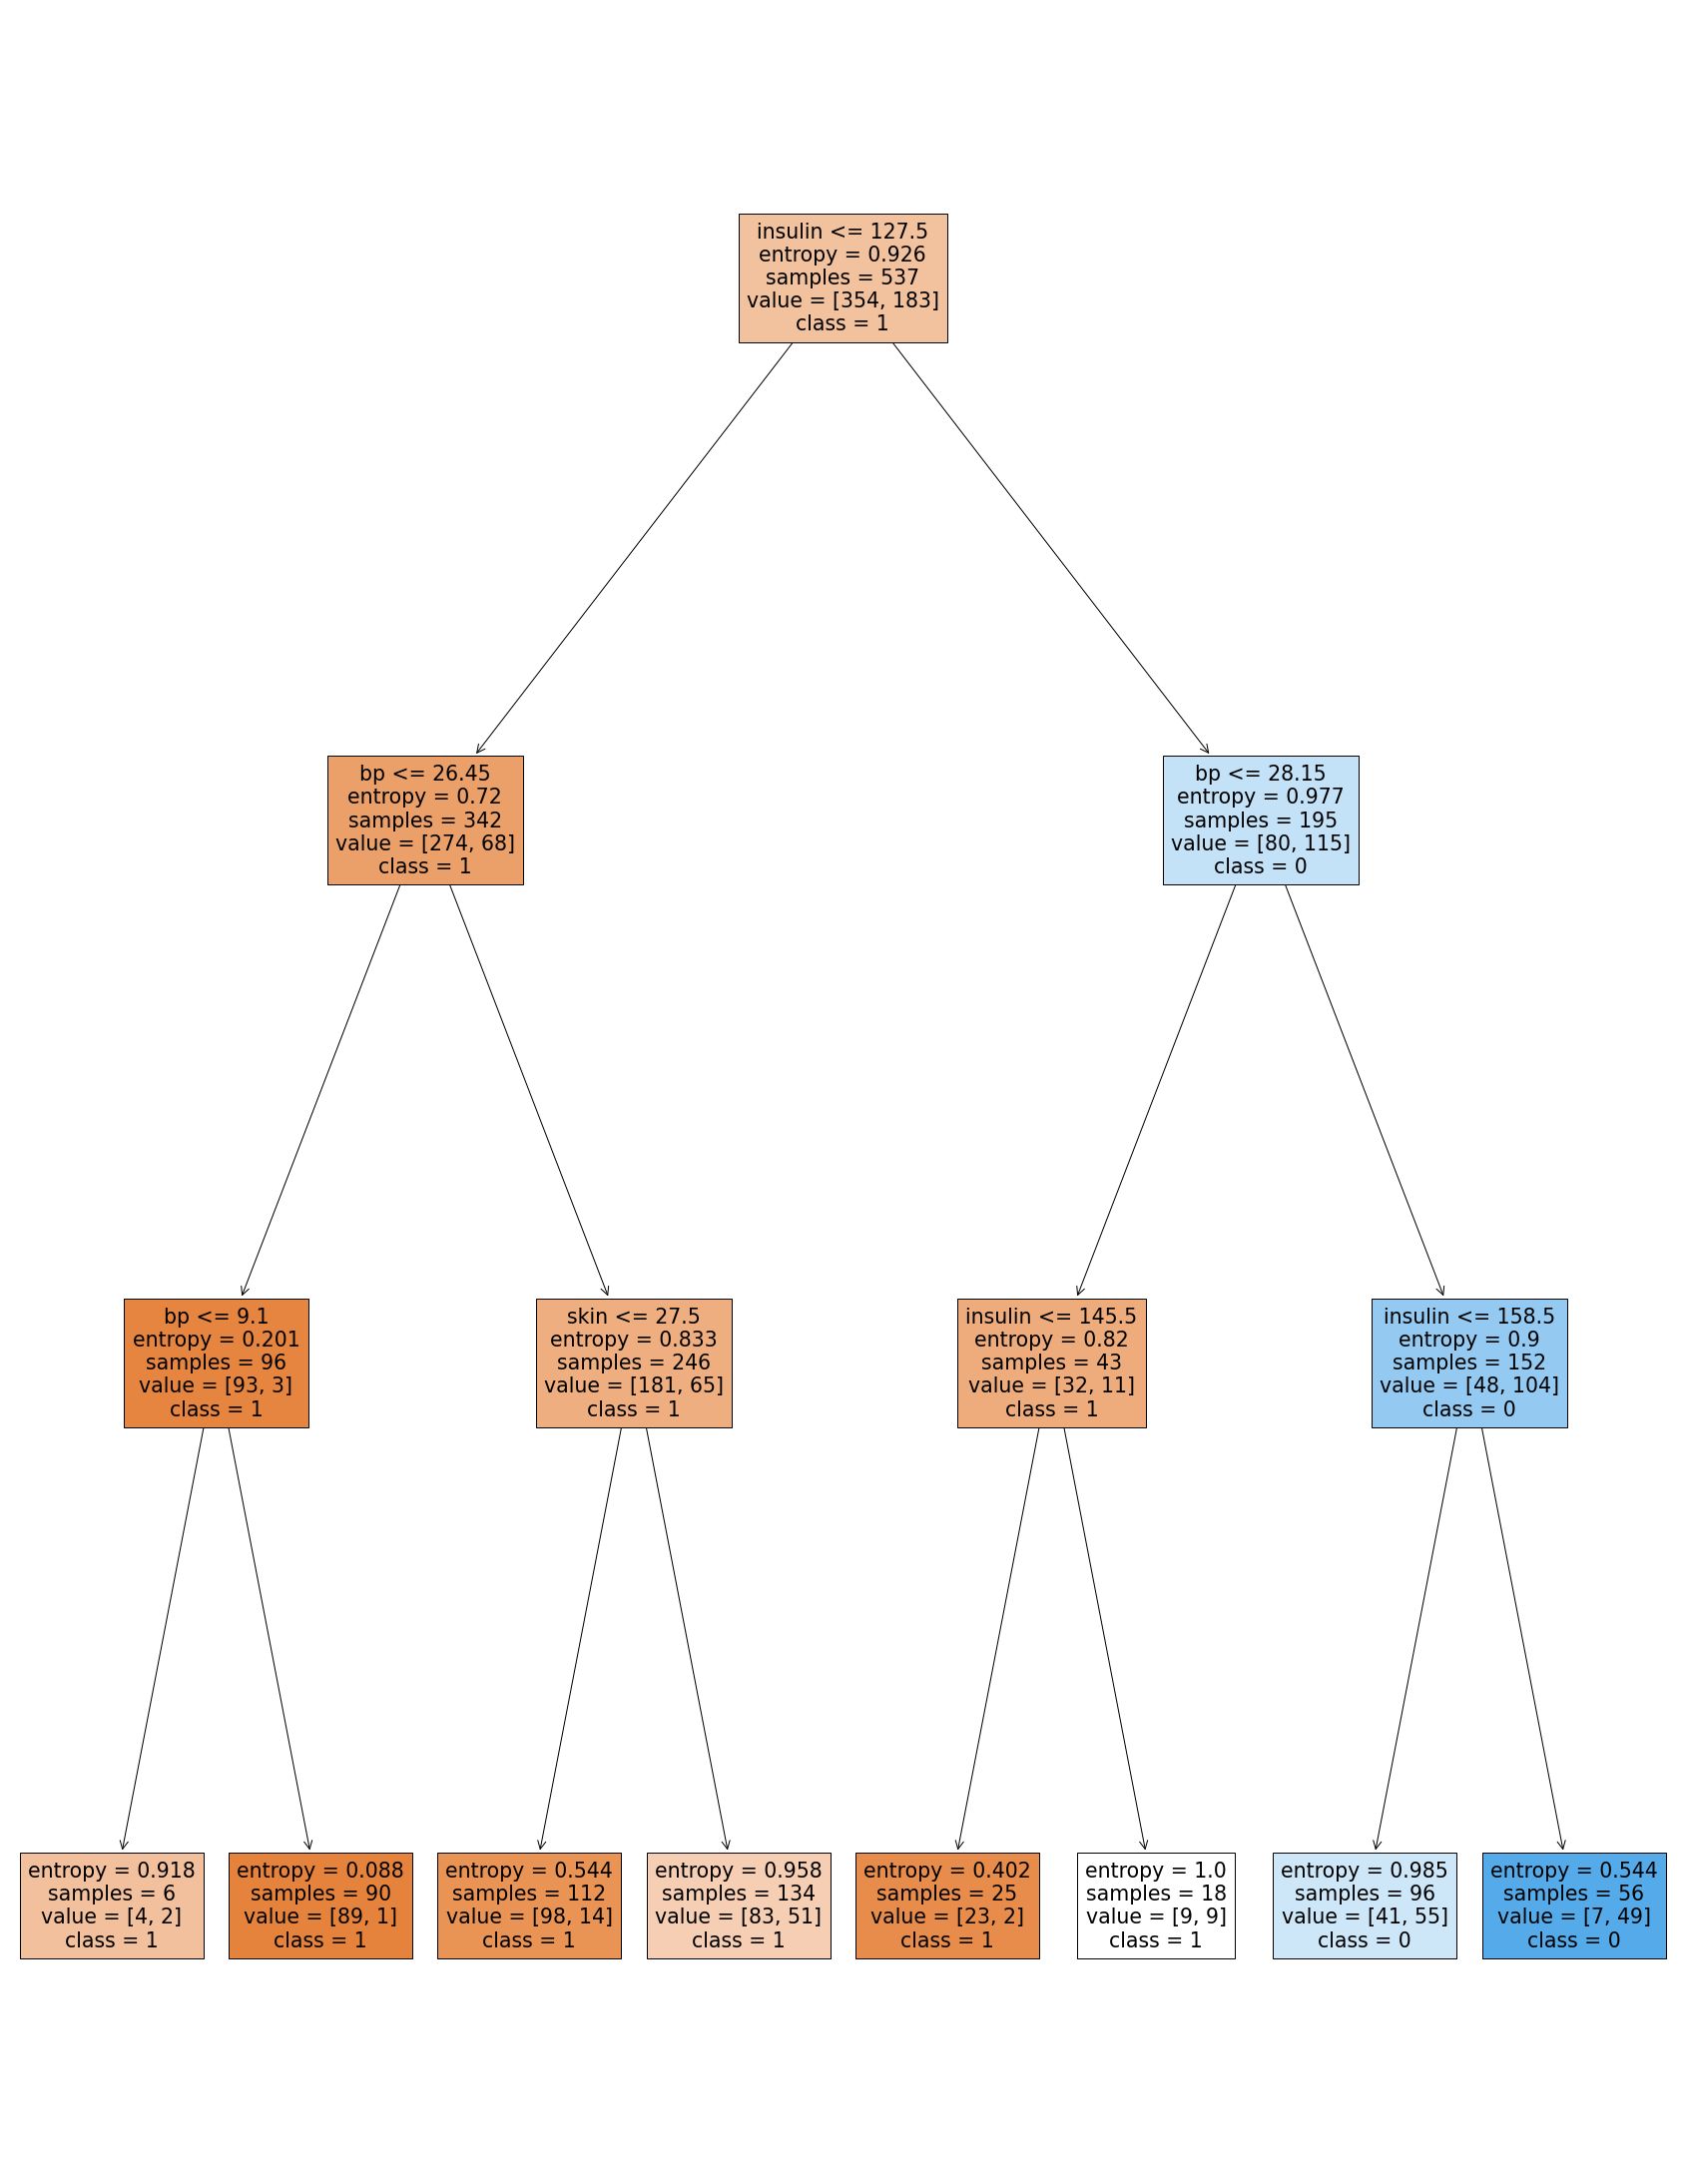

In [38]:
fig = plt.figure(figsize=(30,40))
_ = tree.plot_tree(clf, 
                   feature_names=list(pima.iloc[:, 0:8].columns),  
                   class_names=pima.label.unique(),
                   filled=True)

#### Prós
* As árvores de decisão são fáceis de interpretar e visualizar.
* Ele pode capturar facilmente padrões não lineares.
* Requer menos pré-processamento de dados do usuário, por exemplo, não há necessidade de normalizar colunas.
* Pode ser usado para engenharia de recursos, como previsão de valores ausentes, adequado para seleção de variáveis.
* A árvore de decisão não tem suposições sobre a distribuição devido à natureza não paramétrica do algoritmo.

#### Contras
* Sensível a dados ruidosos. Ele pode sobrecarregar dados ruidosos.
* A pequena variação (ou variação) nos dados pode resultar em uma árvore de decisão diferente. Isso pode ser reduzido por algoritmos de bagging e boosting.
* As árvores de decisão são influenciadas pelo conjunto de dados de desequilíbrio, portanto, é recomendável equilibrar o conjunto de dados antes de criar a árvore de decisão.